In [1]:
from osrs_GE import *
import GE_object
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df_CTI = read_CTI_master_file('24h')
df_CTI.head()

timestamp  avgHighPrice  avgLowPrice  highPriceVolume  \
id date                                                                 
2  2023-09-04  1693785600           158        153.0         25448193   
   2023-09-05  1693872000           157        152.0         20442989   
   2023-09-06  1693958400           155        151.0         18166461   
   2023-09-07  1694044800           154        151.0         19839631   
   2023-09-08  1694131200           153        150.0         19325295   

               lowPriceVolume  
id date                        
2  2023-09-04         7792403  
   2023-09-05         7067147  
   2023-09-06         7738376  
   2023-09-07         6687883  
   2023-09-08         7420479

In [50]:
check(df_CTI)[0]

timestamp  avgHighPrice  avgLowPrice  highPriceVolume  \
id   date                                                                 
1779 2024-04-14  1713052800             1          NaN          4782387   
7936 2024-04-03  1712102400             1          NaN         92224230   
     2024-05-04  1714780800             1          NaN        156057008   
     2024-07-14  1720915200             1          NaN         96610687   
     2024-09-07  1725667200             1          NaN         82634241   
     2024-09-08  1725753600             1          NaN         97020187   
     2024-09-11  1726012800             1          NaN         95224109   

                 lowPriceVolume  
id   date                        
1779 2024-04-14               0  
7936 2024-04-03               0  
     2024-05-04               0  
     2024-07-14               0  
     2024-09-07               0  
     2024-09-08               0  
     2024-09-11               0

In [51]:
for idx,new_df in check(df_CTI)[0].groupby(level=0):
    print(idx, item_name_from_id(idx))

1779 Flax
7936 Pure essence


- pure essence can just set the price to 1 or just exclude because that never moves, same with the flax
- cowhide/rune armor set - can impute with a interpolated value from surrounding days or look at average price difference between high and low for the year

In [52]:
to_check = check(df_CTI)[0]
for idx in to_check.index:
    df_CTI.loc[(idx[0],idx[1]),'avgLowPrice'] = 1

## Exploring

In [53]:
df_CTI.groupby("id")[['avgHighPrice','avgLowPrice','highPriceVolume','lowPriceVolume']].mean()

,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume
id,,,,
2,1.884853e+02,1.838043e+02,2.173247e+07,8.254364e+06
225,4.836230e+02,4.761364e+02,3.485398e+05,5.842651e+05
231,3.787219e+02,3.734144e+02,8.938774e+05,8.336990e+05
263,3.604941e+03,3.581021e+03,3.674719e+04,1.063877e+05
377,9.614973e+01,9.471925e+01,5.623496e+05,8.101853e+05
385,8.118262e+02,8.036872e+02,2.715394e+06,1.622508e+06
444,1.758529e+02,1.741765e+02,5.479470e+06,8.656772e+06
453,1.658984e+02,1.634947e+02,1.019948e+07,1.556359e+07
536,3.240842e+03,3.208479e+03,1.115094e+06,1.287514e+06


In [54]:
df_CTI[df_CTI['avgHighPrice'] < df_CTI['avgLowPrice']].shape

(474, 5)

- this occurs when volume buys and/or sells aggressively past the last trade price
- flipping opportunity?
- could also represent some large intraday volatility

In [55]:
df_CTI.index.unique(level='id').shape

(27,)

In [56]:
df_CTI = compute_VWAP(df_CTI)

In [57]:
df_index

,name,id
0,Coal,453
1,Steel bar,2353
2,Gold ore,444
3,Nature rune,561
4,Death rune,560
5,Pure essence,7936
6,Yew logs,1515
7,Magic logs,1513
8,Cowhide,1739
9,Raw lobster,377


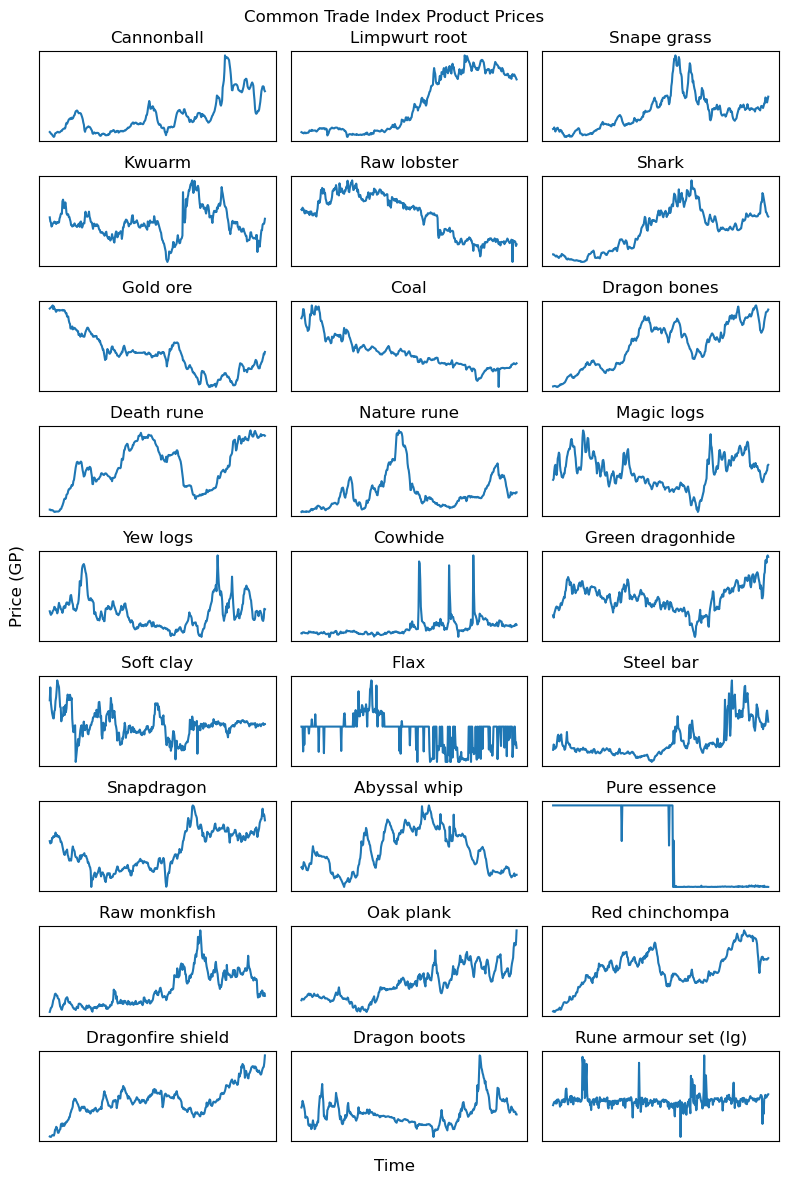

In [58]:
fig,axs = plt.subplots(9,3,figsize=(8,12))

ct = 0
for id, new_df in df_CTI.groupby(by='id'):
    ax = axs[ct//3, ct%3]
    ax.tick_params(bottom=False)
    
    ax.plot(new_df.index.get_level_values(1),new_df['VWAP'])
    ax.set_title(item_name_from_id(id))

    ct += 1


fig.supxlabel("Time")
fig.supylabel("Price (GP)")
fig.suptitle("Common Trade Index Product Prices")


plt.setp(axs, xticks=[], yticks=[])
fig.tight_layout()
plt.show()

In [59]:
df_CTI['simpRet'] = (df_CTI['VWAP']/df_CTI.groupby('id')['VWAP'].shift(1)) - 1

df_CTI.groupby('id')['simpRet'].agg(nrow=lambda x:x.shape[0])

,nrow
id,
2,373
225,374
231,374
263,374
377,374
385,374
444,374
453,374
536,374


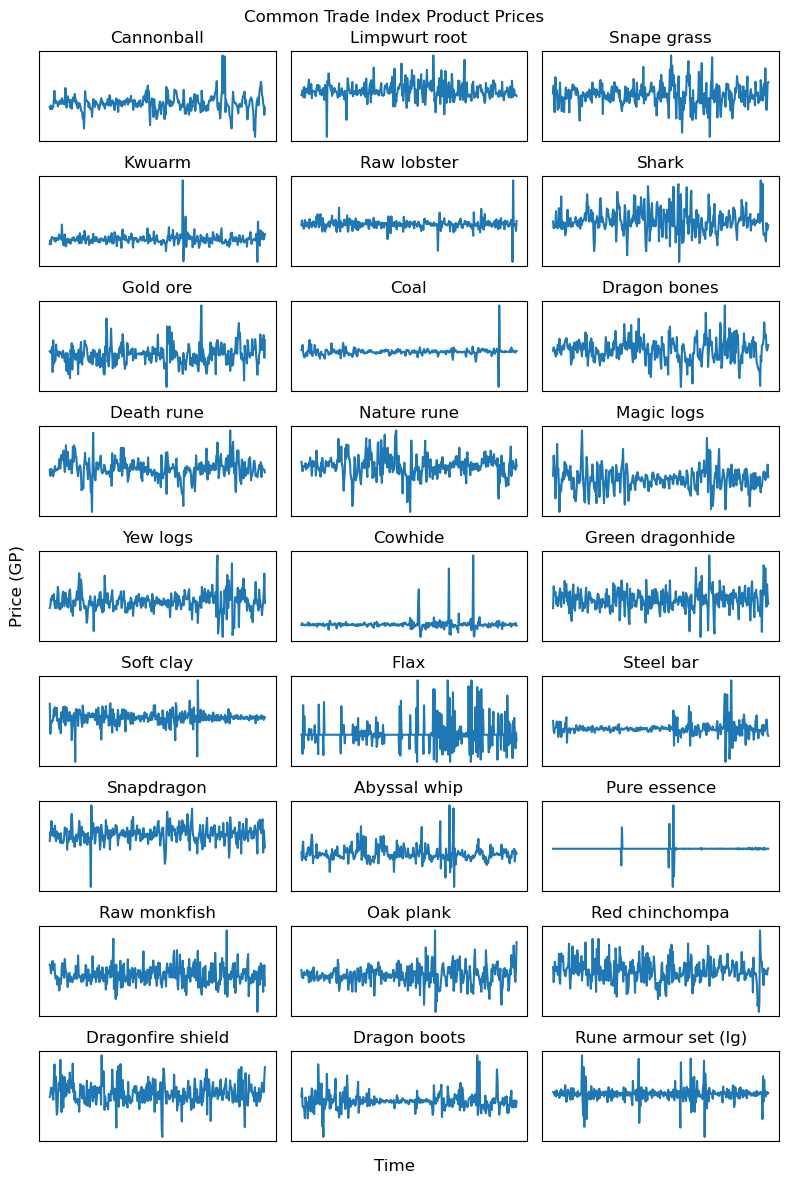

In [13]:
fig,axs = plt.subplots(9,3,figsize=(8,12))

ct = 0
for id, new_df in df_CTI.groupby(by='id'):
    ax = axs[ct//3, ct%3]
    ax.tick_params(bottom=False)
    
    ax.plot(new_df.index.get_level_values(1),new_df['simpRet'])
    ax.set_title(item_name_from_id(id))

    ct += 1


fig.supxlabel("Time")
fig.supylabel("Price (GP)")
fig.suptitle("Common Trade Index Product Prices")

plt.setp(axs, xticks=[], yticks=[])
fig.tight_layout()
plt.show()

In [14]:
lret_vol = ((np.log(df_CTI.groupby('id')['VWAP'].shift(-1)/df_CTI['VWAP'])).groupby('id').std()
            *np.sqrt(364)).sort_values()

lret_vol.index = pd.Series(lret_vol.index.values).apply(item_name_from_id)
lret_vol

Gold ore                0.113426
Snapdragon              0.190785
Magic logs              0.261353
Rune armour set (lg)    0.277394
Dragon bones            0.298346
Abyssal whip            0.326007
Green dragonhide        0.328967
Raw lobster             0.342370
Dragon boots            0.344314
Cannonball              0.353688
Death rune              0.357512
Oak plank               0.361858
Dragonfire shield       0.399399
Nature rune             0.422984
Soft clay               0.472218
Red chinchompa          0.477169
Kwuarm                  0.524019
Yew logs                0.547988
Coal                    0.549132
Shark                   0.568409
Limpwurt root           0.579943
Snape grass             0.682503
Steel bar               0.690563
Raw monkfish            0.781696
Pure essence            1.068862
Cowhide                 2.155752
Flax                    4.207308
Name: VWAP, dtype: float64

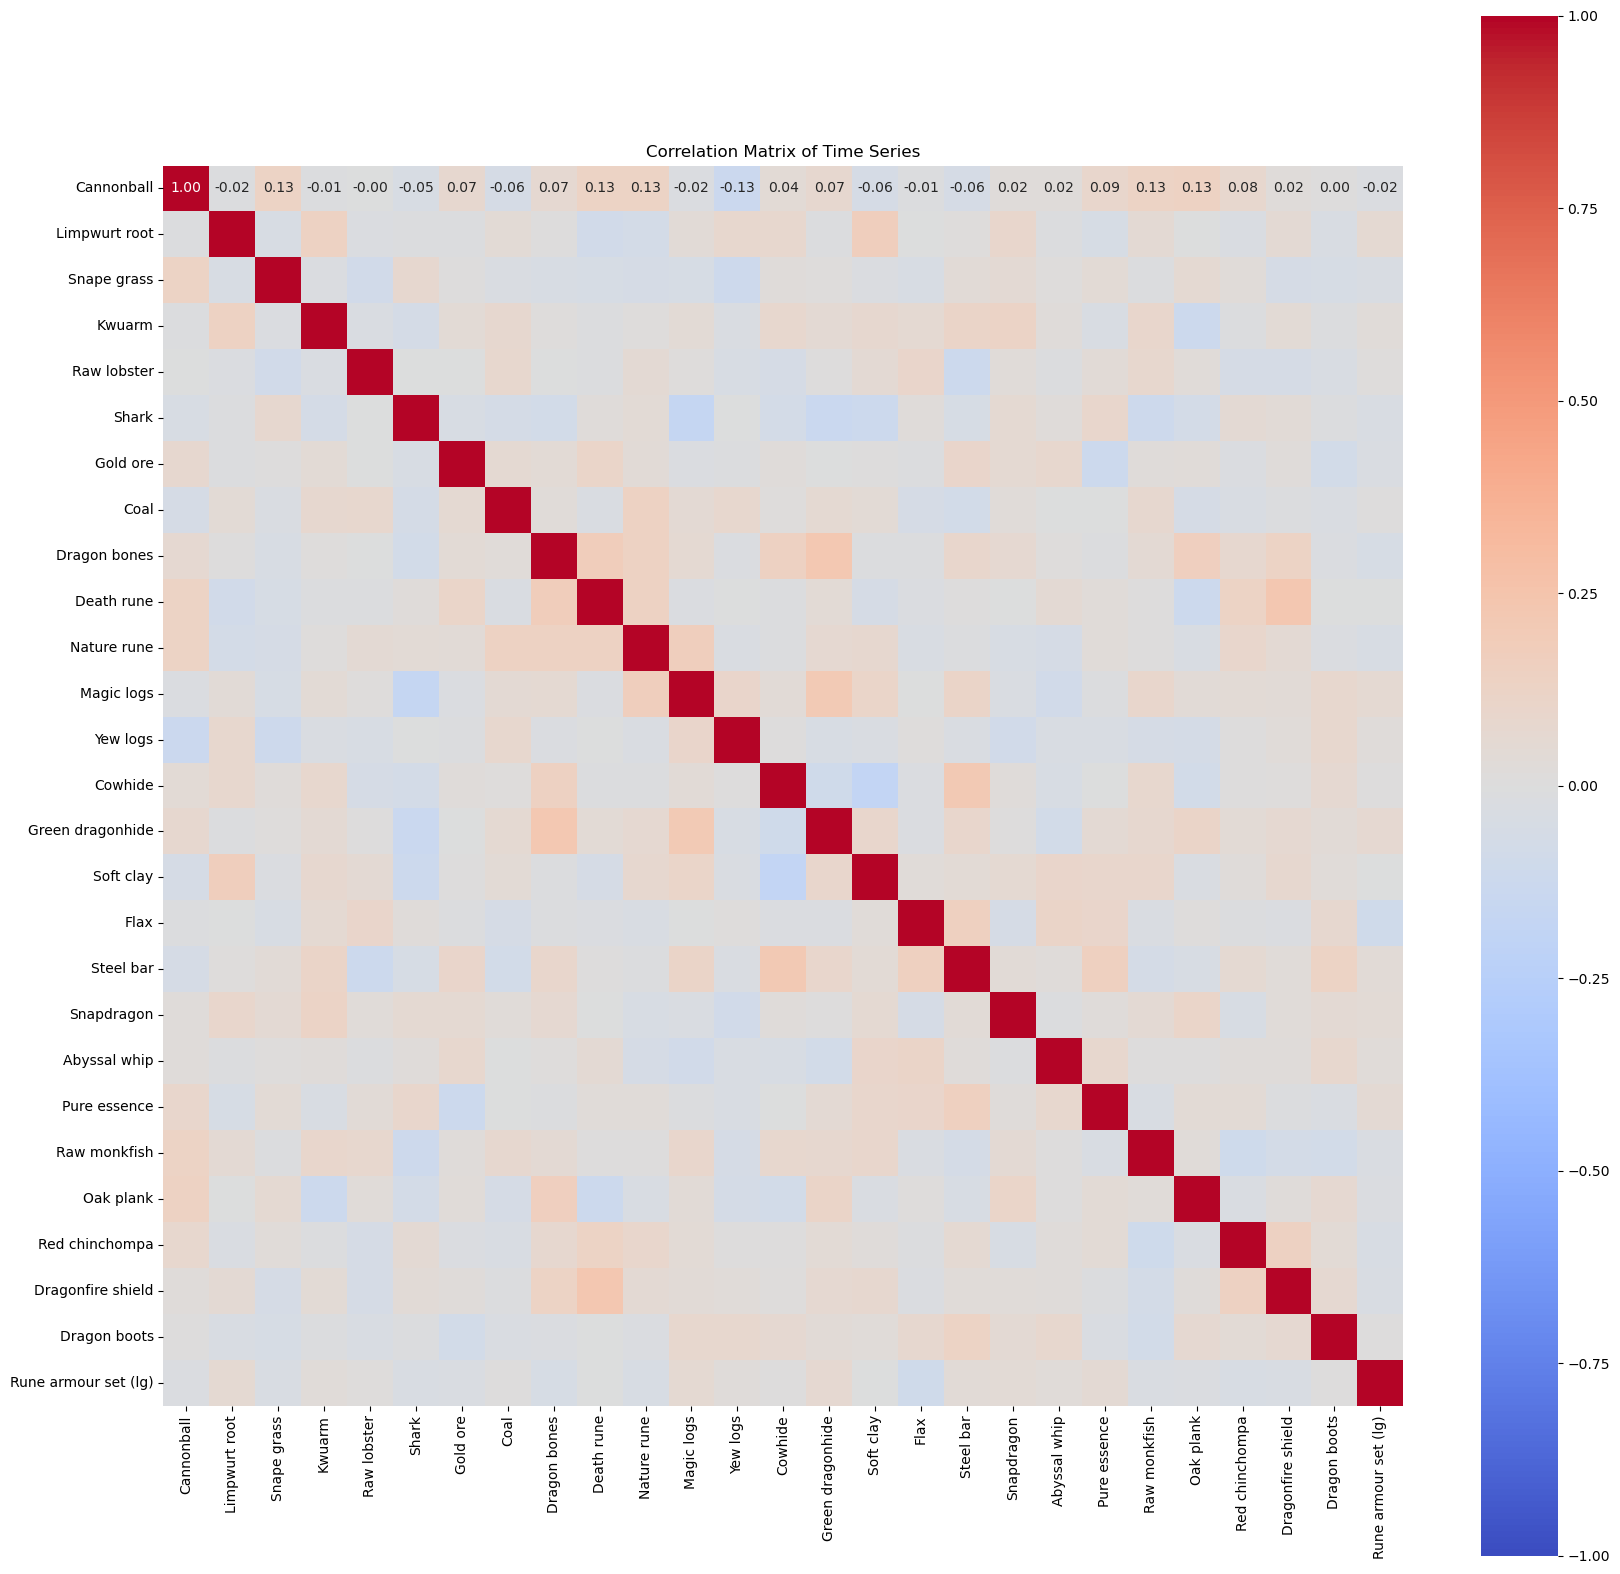

In [15]:
df_corr = pd.DataFrame()

for idx,df_select in df_CTI.groupby(level='id'):
    date_index = df_select.index.get_level_values(1)
    
    temp = pd.DataFrame(index = date_index)
    temp[idx] = df_select.loc[idx,'simpRet']

    df_corr = df_corr.join(temp,how='outer')

df_corr = df_corr.dropna()

corr_matrix = df_corr.rename(item_name_from_id,axis=1).corr()
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',square=True,vmin=-1,vmax=1)

plt.title('Correlation Matrix of Time Series')
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

pd.reset_option('display.float_format')
adf_res = (df_CTI.dropna()).groupby(level=['id'])['simpRet'].agg(ADFtest = 
                                                                lambda x:adfuller(x)[1]<.05,
                                                               ADFtest_p_val =
                                                                lambda x:adfuller(x)[1])

adf_res = adf_res.rename(index=item_name_from_id)
adf_res.sort_values('ADFtest_p_val',ascending=False)

,ADFtest,ADFtest_p_val
id,,
Snape grass,True,2.262608e-09
Gold ore,True,1.056762e-09
Steel bar,True,4.486019e-10
Magic logs,True,3.357178e-10
Green dragonhide,True,4.830470e-11
Kwuarm,True,4.224623e-11
Death rune,True,3.871715e-13
Rune armour set (lg),True,2.469816e-15
Cannonball,True,8.584468e-18


# Beta

In [17]:
def return_last_n_days(df,n_days,col_name = 'VWAP',log_ret=False):
    # price data frame with datetime index and VWAP column
    df = df.sort_index()
    n_days_ago = df.index.levels[1].sort_values().unique()[-1] - pd.Timedelta(n_days,'D')
    fltr = df.index.get_level_values(1)>=n_days_ago
    last_n_df = df.loc[fltr]
    if log_ret:
        last_n_ret = last_n_df.groupby('id')[col_name].agg(lret = lambda x:np.log(x.iloc[-1]/x.iloc[0])).sort_values(by='lret')
        last_n_ret = last_n_ret.rename(axis=1,mapper = {'lret':str(n_days)+'_days_lret'})
        last_n_ret['name'] = pd.Series(last_n_ret.index.values).apply(item_name_from_id).values
        return last_n_ret
    last_n_ret = last_n_df.groupby('id')[col_name].agg(ret=lambda x:(x.iloc[-1]/x.iloc[0]) - 1).sort_values(by='ret')
    last_n_ret = last_n_ret.rename(axis=1,mapper={'ret':str(n_days)+'_days_ret'})
    last_n_ret['name'] = pd.Series(last_n_ret.index.values).apply(item_name_from_id).values
    return last_n_ret

def return_between(df,date1,date2,col_name = 'VWAP',log_ret = False):
    if date1 == date2:
        raise InvalidDateException("Dates are the same")
    later = max(date1,date2)
    early = min(date1,date2)
    
    fltr = (df.index.get_level_values(1) <= later) & (df.index.get_level_values(1) >= early)
    fltr_df = df.loc[fltr]
    
    if log_ret:
        df_ret = fltr_df.groupby('id')[col_name].agg(lret = lambda x:np.log(x.iloc[-1]/x.iloc[0])).sort_values(by='lret')
        df_ret['name'] = pd.Series(df_ret.index.values).apply(item_name_from_id).values
        return df_ret
    df_ret = fltr_df.groupby('id')[col_name].agg(ret=lambda x:(x.iloc[-1]/x.iloc[0]) - 1).sort_values(by='ret')
    df_ret['name'] = pd.Series(df_ret.index.values).apply(item_name_from_id).values
    return df_ret
    

In [18]:
return_last_n_days(df_CTI,30)

,30_days_ret,name
id,,
7944,-0.344655,Raw monkfish
1779,-0.301196,Flax
10034,-0.179986,Red chinchompa
561,-0.169276,Nature rune
1515,-0.152866,Yew logs
1739,-0.123702,Cowhide
225,-0.121300,Limpwurt root
11840,-0.107286,Dragon boots
2353,-0.048310,Steel bar


File does not exist for Master Files/items/master_file_11284_24h.csv
Saving to Master Files/items/master_file_11284_24h.csv


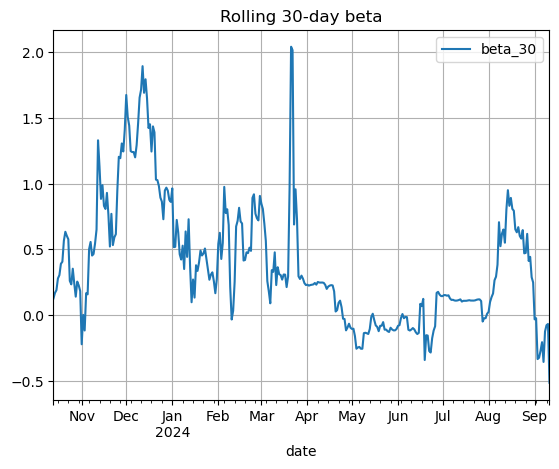

,beta_30
date,
2023-10-13,0.127484
2023-10-14,0.168795
2023-10-15,0.190430
2023-10-16,0.279042
2023-10-17,0.304671
...,...
2024-09-07,-0.355794
2024-09-08,-0.124416
2024-09-09,-0.076867


In [114]:
from sklearn.linear_model import LinearRegression

def _compute_beta(series,index,print_errors = False):
    try:
        s1 = pd.Series(series.values,index=series.index.get_level_values(1),name='s')
    except:
        s1 = pd.Series(series,name='s')
    s2 = pd.Series(index,name='idx')
    df = pd.concat([s1,s2],axis=1)
    if not df[df.isna().any(axis=1)].empty and print_errors:
        print(series.index.get_level_values(0)[0])
        print(df[df.isna().any(axis=1)])
    
    df = df.dropna()
    
    model = LinearRegression(fit_intercept=False).fit(df['idx'].values.reshape(-1,1),df['s'])
    return model.coef_[0]


def compute_betas(df,n,print_missing=False,print_errors=False):
    # compute betas over different time frames
    start_date = datetime.today() - pd.Timedelta(n,'D')
    
    if type(df.index) == pd.core.indexes.multi.MultiIndex:
        CTI_idx = compute_CTI(df = df)
        CTI_idx_ret = (CTI_idx/CTI_idx.shift(1)) - 1
        #start_date = df.groupby('id')['simpRet'].agg(latest = lambda x:x.index.levels[1].max()).min().values[0] - pd.Timedelta(n,'D')
        df_fltr = df[df.index.get_level_values(1) >= start_date]
        CTI_idx_ret = CTI_idx_ret[CTI_idx_ret.index >= start_date]
        nrows = df_fltr.groupby('id')['simpRet'].agg(nrow=lambda x:x.shape[0])
        max_days = nrows.max().values[0]
        if print_missing:
            print(nrows[nrows['nrow']!= max_days])
        res = df_fltr.groupby('id')['simpRet'].agg(beta = lambda x:_compute_beta(x,CTI_idx_ret,print_errors))
        res['name'] = pd.Series(res.index.values).apply(item_name_from_id).values
        res = (res.rename({'beta':'beta_'+str(n)},axis=1)).sort_values(by='beta_'+str(n))
    else:
        CTI_idx = compute_CTI()
        CTI_idx_ret = (CTI_idx/CTI_idx.shift(1)) - 1
        df_fltr = df[df.index >= start_date]
        CTI_idx_ret = CTI_idx_ret[CTI_idx_ret.index >= start_date]
        res = _compute_beta(df_fltr['simpRet'],CTI_idx_ret,print_errors)
        
    return res
        
    
    
def rolling_betas(item_id,window_size = 30,interval='24h',plot=False):
    CTI_idx = compute_CTI(interval=interval)
    CTI_idx_ret = (CTI_idx/CTI_idx.shift(1)) - 1
    
    if item_id == 0:
        # debugging
        CTI_series = compute_CTI(interval=interval)
        item_ret_series = (CTI_series/CTI_series.shift(1))-1
    else:
        df_item = compute_VWAP(read_item_master_file(item_id,interval))
        item_ret_series = (df_item['VWAP']/df_item['VWAP'].shift(1))-1
    
    
    CTI_idx_ret = CTI_idx_ret.dropna()
    item_ret_series = item_ret_series.dropna()
    df = pd.DataFrame({'CTI_ret':CTI_idx_ret,str(item_id)+'_ret':item_ret_series}).dropna()
    rolling = df[['CTI_ret']].rolling(window=window_size,min_periods=window_size)
    res = ((rolling.cov(df[str(item_id)+'_ret']))/rolling.var()).dropna().rename({'CTI_ret':'beta_'+str(window_size)},axis=1)
    if plot:
        res.plot()
        plt.grid()
        plt.title('Rolling {}-day beta'.format(window_size))
        plt.show()
    
    return res
    
rolling_betas(11284,plot=True)

In [115]:
compute_betas(df_CTI.loc[11284],30)

-0.5563387408845906

In [86]:
compute_betas(df_CTI,30)

,beta_30,name
id,,
11284,-0.560032,Dragonfire shield
385,-0.540619,Shark
377,-0.222524,Raw lobster
8778,-0.219480,Oak plank
13024,-0.173517,Rune armour set (lg)
453,-0.104162,Coal
11840,-0.091840,Dragon boots
1761,-0.034485,Soft clay
1515,-0.013714,Yew logs


---

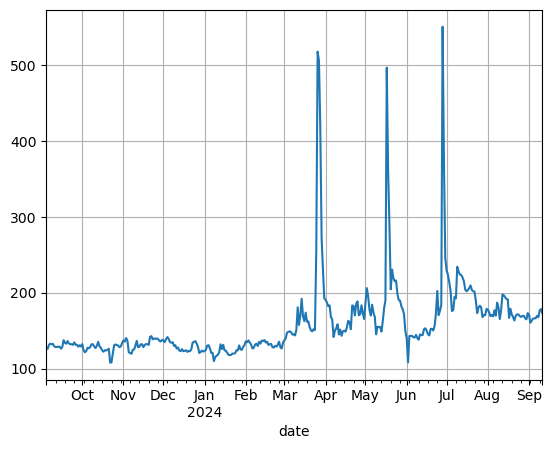

In [32]:
df_CTI.loc[1739]['VWAP'].plot()
plt.grid()
plt.show()

In [35]:
df_CTI.loc[1739].sort_values(by='VWAP',ascending=False)

,timestamp,avgHighPrice,avgLowPrice,highPriceVolume,lowPriceVolume,VWAP,simpRet
date,,,,,,,
2024-06-28,1719532800,796,444.0,17279,39824,550.512933,1.986076
2024-03-26,1711411200,575,494.0,26433,63737,517.744849,1.013649
2024-03-27,1711497600,451,531.0,34064,74724,505.950178,-0.022781
2024-05-17,1715904000,724,458.0,6209,36560,496.616615,1.610819
2024-03-28,1711584000,458,408.0,29214,95712,419.692522,-0.170486
...,...,...,...,...,...,...,...
2024-01-09,1704758400,116,115.0,9497,13270,115.417139,0.049198
2024-01-08,1704672000,118,106.0,9337,18638,110.005147,-0.091423
2023-10-23,1698019200,110,106.0,71254,41527,108.527163,0.005089


---

In [33]:
date1 = '2024-08-10'
date2 = '2024-09-10'

fltr = (df_CTI.index.get_level_values(1) >= date1) & (df_CTI.index.get_level_values(1) <= date2)
last_n_df = df_CTI.loc[fltr]

last_n_ret = last_n_df.groupby('id')['VWAP'].agg(ret = lambda x:x.iloc[-1]/
                                                       x.iloc[0] - 1).sort_values(by='ret')
# pure essence numbers are bad
last_n_ret = last_n_ret.dropna()

last_n_df['ttlVolume'] = last_n_df['highPriceVolume'] + last_n_df['lowPriceVolume']
last_n_df['norm_ttlVolume']=last_n_df['ttlVolume']/last_n_df.groupby('id')['ttlVolume'].transform('first')

last_n_df['norm_VWAP']=last_n_df['VWAP']/(last_n_df.groupby('id')['VWAP'].transform('first'))

return_between(df_CTI,date1,date2)

/var/folders/hq/g_wf2hyx7wv0cnr8_ttnkklw0000gn/T/ipykernel_8608/175820045.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_n_df['ttlVolume'] = last_n_df['highPriceVolume'] + last_n_df['lowPriceVolume']
/var/folders/hq/g_wf2hyx7wv0cnr8_ttnkklw0000gn/T/ipykernel_8608/175820045.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_n_df['norm_ttlVolume']=last_n_df['ttlVolume']/last_n_df.groupby('id')['ttlVolume'].transform('first')
/var/folders/hq/g_wf2hyx7wv0cnr8_ttnkklw0000gn/T/ipykernel_8608/175

,ret,name
id,,
7944,-0.261473,Raw monkfish
561,-0.222540,Nature rune
10034,-0.197235,Red chinchompa
1515,-0.165570,Yew logs
11840,-0.135847,Dragon boots
225,-0.120801,Limpwurt root
2,-0.071308,Cannonball
377,-0.024347,Raw lobster
4151,-0.014624,Abyssal whip


we can ignore flax because it only really trades at 1 or 2 gp.

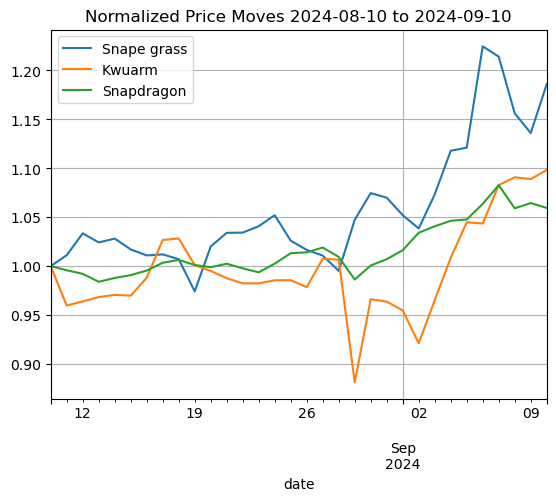

In [34]:
last_n_df.loc[231,'norm_VWAP'].plot(label=item_name_from_id(231))
last_n_df.loc[263,'norm_VWAP'].plot(label=item_name_from_id(263))
last_n_df.loc[3000,'norm_VWAP'].plot(label=item_name_from_id(3000))
plt.legend()
plt.grid()
plt.title('Normalized Price Moves {0} to {1}'.format(last_n_df.index.get_level_values(1).min().strftime('%Y-%m-%d'),
                                                    last_n_df.index.get_level_values(1).max().strftime('%Y-%m-%d')))
plt.show()